In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df=pd.read_csv('weatherAUS.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
rt=pd.get_dummies(df['RainTomorrow'])
df['RainTomorrow']

0          No
1          No
2          No
3          No
4          No
         ... 
145455     No
145456     No
145457     No
145458     No
145459    NaN
Name: RainTomorrow, Length: 145460, dtype: object

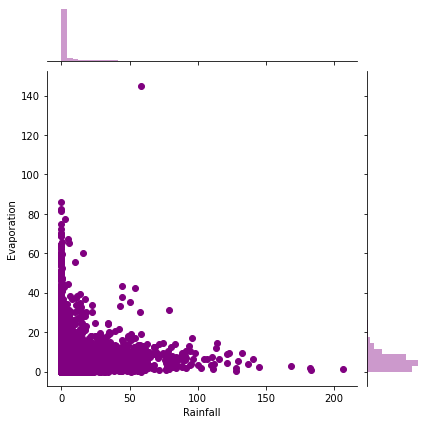

In [8]:
sns.jointplot(x='Rainfall',y='Evaporation',data=df,color='purple')

In [9]:
num_cols = df.select_dtypes('number').columns.to_list()
num_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

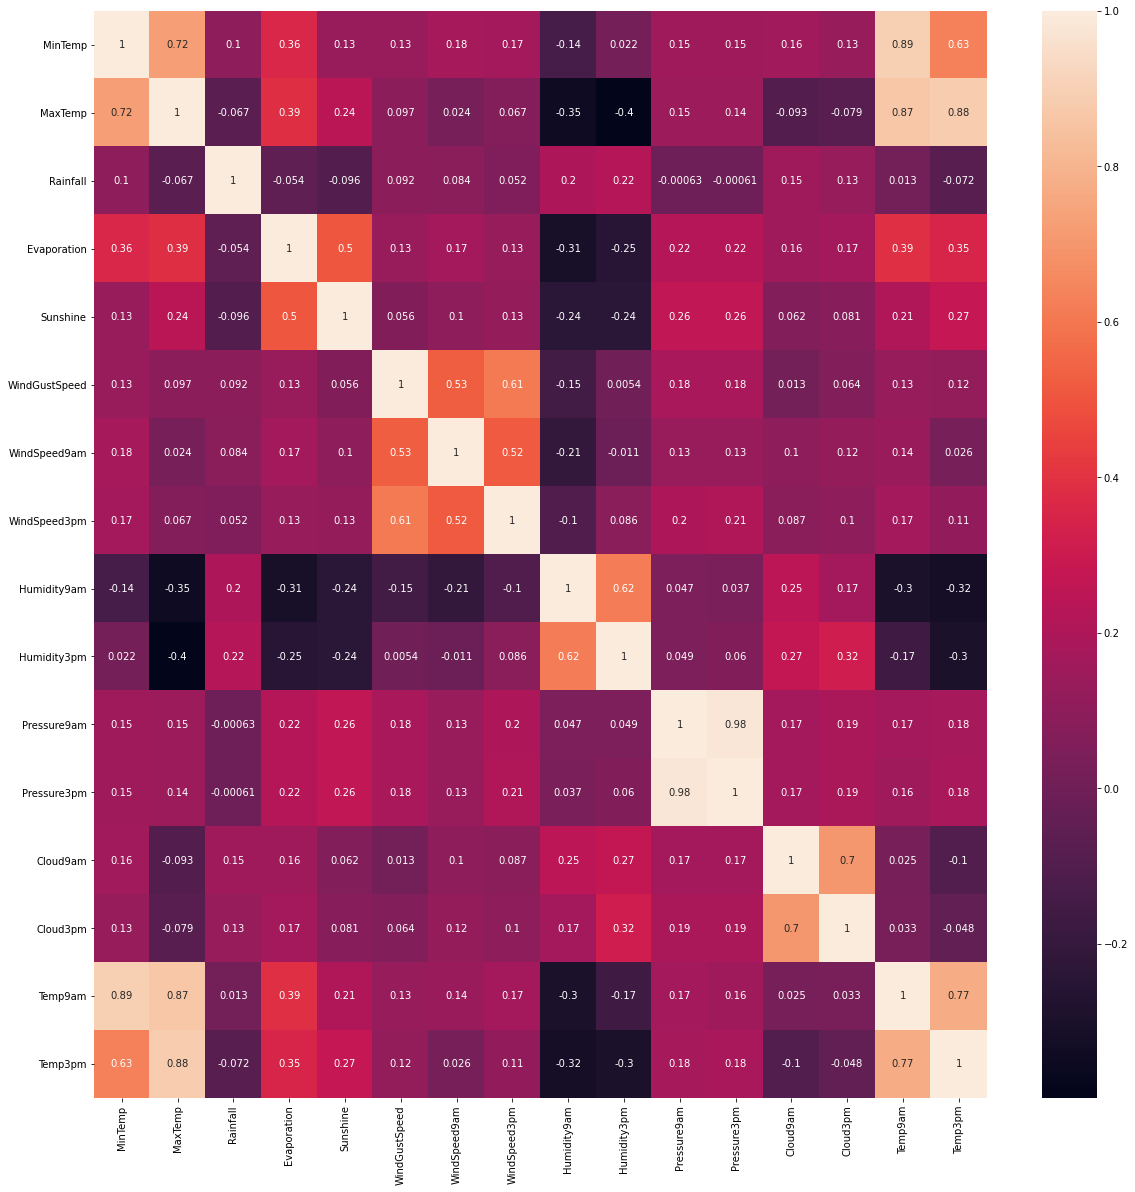

In [34]:
plt.figure(figsize=(20,20))
sns.heatmap(df[num_cols].corr(), annot=True)

In [11]:
from sklearn.model_selection import train_test_split
df.drop(labels=['Date','Location','WindDir9am','WindGustDir','WindDir3pm'],axis=1,inplace=True)
df.RainTomorrow.replace(to_replace=['No', 'Yes'], value=[0, 1],inplace=True)
df.RainToday.replace(to_replace=['No', 'Yes'], value=[0, 1],inplace=True)

df=df.fillna(0)

X=df.drop('RainTomorrow',axis=1)
y=df['RainTomorrow']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [12]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,0.0,0.0,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0.0,0.0
1,7.4,25.1,0.0,0.0,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,0.0,0.0
2,12.9,25.7,0.0,0.0,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0.0,0.0
3,9.2,28.0,0.0,0.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,0.0,0.0
4,17.5,32.3,1.0,0.0,0.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,0.0,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,0.0,0.0,10.1,22.4,0.0,0.0
145456,3.6,25.3,0.0,0.0,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,0.0,0.0,10.9,24.5,0.0,0.0
145457,5.4,26.9,0.0,0.0,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,0.0,0.0,12.5,26.1,0.0,0.0
145458,7.8,27.0,0.0,0.0,0.0,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0.0,0.0


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(df.drop('RainTomorrow',axis=1))

StandardScaler()

In [16]:
scaled_features = scaler.transform(df.drop('RainTomorrow',axis=1))

In [17]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,0.205232,-0.016205,-0.203581,-0.746516,-0.845389,0.407796,0.681283,0.628382,0.160852,-1.251090,0.307741,0.312970,1.679577,-0.875693,0.017246,0.085732,-0.529795
1,-0.720312,0.280780,-0.275097,-0.746516,-0.845389,0.407796,-1.097764,0.409059,-1.125609,-1.116768,0.317092,0.315235,-0.874270,-0.875693,0.061940,0.413155,-0.529795
2,0.128104,0.361776,-0.275097,-0.746516,-0.845389,0.527921,0.570092,0.847705,-1.411490,-0.892897,0.307419,0.318147,-0.874270,-0.219635,0.628056,0.269089,-0.529795
3,-0.442649,0.672260,-0.275097,-0.746516,-0.845389,-0.793463,-0.319431,-1.016540,-1.077963,-1.519736,0.339661,0.331412,-0.874270,-0.875693,0.196020,0.701288,-0.529795
4,0.837688,1.252731,-0.155903,-0.746516,-0.845389,0.227607,-0.764193,0.189736,0.684967,-0.758574,0.317736,0.309411,1.360346,1.748540,0.151327,1.120390,-0.529795


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['RainTomorrow'],
                                                    test_size=0.30)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=1)

In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [23]:
pred = knn.predict(X_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(confusion_matrix(y_test,pred))

[[29579  4463]
 [ 4905  4691]]


In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86     34042
         1.0       0.51      0.49      0.50      9596

    accuracy                           0.79     43638
   macro avg       0.69      0.68      0.68     43638
weighted avg       0.78      0.79      0.78     43638



In [27]:
# WITH K=34
knn = KNeighborsClassifier(n_neighbors=34)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=34')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=34


[[32736  1306]
 [ 5681  3915]]


              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     34042
         1.0       0.75      0.41      0.53      9596

    accuracy                           0.84     43638
   macro avg       0.80      0.68      0.72     43638
weighted avg       0.83      0.84      0.82     43638



In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))

[[32503  1539]
 [ 4898  4698]]


In [31]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     34042
         1.0       0.75      0.49      0.59      9596

    accuracy                           0.85     43638
   macro avg       0.81      0.72      0.75     43638
weighted avg       0.84      0.85      0.84     43638



In [32]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(X_train,y_train)


SVC()

In [33]:
from sklearn.model_selection import GridSearchCV

In [35]:
param_grid = {'C': [1, 10], 'gamma': [0.1,0.01]}
grid=GridSearchCV(SVC(),param_grid,verbose=2,refit=2)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1, gamma=0.1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... C=1, gamma=0.1, total= 5.2min
[CV] C=1, gamma=0.1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.2min remaining:    0.0s


[CV] ................................... C=1, gamma=0.1, total= 5.4min
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total= 5.4min
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total= 6.0min
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total= 5.3min
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total= 2.7min
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total= 3.1min
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total= 3.2min
[CV] C=1, gamma=0.01 .................................................
[CV] .

In [ ]:
grid_predictions=grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,grid_predictions))

In [ ]:
print(classification_report(y_test,grid_predictions))

In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(df.drop('RainTomorrow',axis=1))

KMeans(n_clusters=2)

In [38]:
kmeans.cluster_centers_

array([[1.24294383e+01, 2.34050736e+01, 2.31286026e+00, 3.42842515e+00,
        4.37927856e+00, 3.83076184e+01, 1.42977171e+01, 1.89246758e+01,
        6.79374885e+01, 5.03786333e+01, 1.01764429e+03, 1.01516166e+03,
        2.92395379e+00, 2.87056781e+00, 1.71814524e+01, 2.16386077e+01,
        2.20464880e-01],
       [9.00249411e+00, 1.97387471e+01, 2.26648337e+00, 3.75268395e-01,
        3.58948678e-01, 2.78609584e+01, 1.02518984e+01, 1.26888583e+01,
        6.49529982e+01, 4.62228987e+01, 1.41044711e+01, 1.72853365e+01,
        1.15972768e+00, 9.56533124e-01, 1.33990966e+01, 1.69422689e+01,
        2.08104216e-01]])

In [39]:
def converter(cluster):
    if cluster==0:
        return 0
    else:
        return 1

In [40]:
df['Cluster'] = df['RainTomorrow'].apply(converter)

In [41]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Cluster
0,13.4,22.9,0.6,0.0,0.0,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0.0,0.0,0
1,7.4,25.1,0.0,0.0,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,0.0,0.0,0
2,12.9,25.7,0.0,0.0,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0.0,0.0,0
3,9.2,28.0,0.0,0.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,0.0,0.0,0
4,17.5,32.3,1.0,0.0,0.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,0


In [42]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[101460  12123]
 [ 28718   3159]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83    113583
           1       0.21      0.10      0.13     31877

    accuracy                           0.72    145460
   macro avg       0.49      0.50      0.48    145460
weighted avg       0.65      0.72      0.68    145460

